In [1]:
import sys
sys.path.append("./")

In [2]:
from collections import Counter

def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

In [43]:
def majority_vote(labels):
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count for count in vote_counts.values() if count == winner_count])
    if num_winners == 1:
        return winner
    else:
        return majority_vote(labels[:-1])

In [4]:
def knn_classify(k, labeled_points, new_point):
    by_distance = sorted(labeled_points, key=lambda point_label: distance(point_label[0], new_point))    
    k_nearest_labels = [label for _, label in by_distance[:k]]
    return majority_vote(k_nearest_labels)

In [29]:
from lib.lin_alg_working_with_data import csv_read

test_data = csv_read(
    "data/iris.csv", 
    [float, float, float, float, str]
)
print(test_data[:5])

[[5.1, 3.5, 1.4, 0.2, 'setosa'], [4.9, 3.0, 1.4, 0.2, 'setosa'], [4.7, 3.2, 1.3, 0.2, 'setosa'], [4.6, 3.1, 1.5, 0.2, 'setosa'], [5.0, 3.6, 1.4, 0.2, 'setosa']]


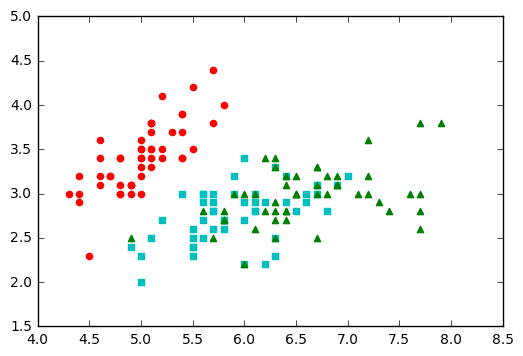

In [6]:
import matplotlib.pyplot as plt

plots = {"setosa": ([], []), "versicolor": ([], []), "virginica": ([], [])}
markers = {"setosa": "o", "versicolor": "s", "virginica": "^"}
colors = {"setosa": "r", "versicolor": "c", "virginica": "g"}

for sepal_length,sepal_width,petal_length,petal_width,species in test_data:
    plots[species][0].append(sepal_length)
    plots[species][1].append(sepal_width)
    
for species, (sepal_length,sepal_width) in plots.items():
    plt.scatter(sepal_length, sepal_width, color=colors[species], marker=markers[species], label=species, zorder=10)

plt.show()

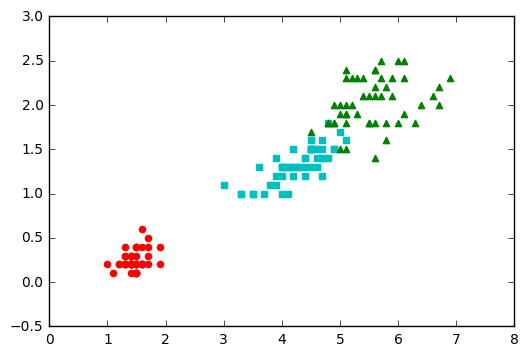

In [16]:
plots = {"setosa": ([], []), "versicolor": ([], []), "virginica": ([], [])}

for sepal_length,sepal_width,petal_length,petal_width,species in test_data:
    plots[species][0].append(petal_length)
    plots[species][1].append(petal_width)
    
for species, (petal_length,petal_width) in plots.items():
    plt.scatter(petal_length, petal_width, color=colors[species], marker=markers[species], label=species, zorder=10)

plt.show()

In [14]:
from lib.lin_alg_vectors import *

for k in [1,3,5,7,11,14, 15,16, 20]:
    num_correct = 0
    
    for item in test_data:
        sepal_length,sepal_width,petal_length,petal_width,species = item
        other_items = [((o_sepal_length,o_sepal_width,o_petal_length,o_petal_width), o_species) for o_sepal_length,o_sepal_width,o_petal_length,o_petal_width,o_species in test_data if (o_sepal_length,o_sepal_width,o_petal_length,o_petal_width,o_species) != item]
        predicted_species = knn_classify(k, other_items, (sepal_length,sepal_width,petal_length,petal_width))
        
        if predicted_species == species:
            num_correct += 1
            
    print("k:", k, "neighbour[s]: ", num_correct, "correct out of", len(test_data))

k: 1 neighbour[s]:  150 correct out of 150
k: 3 neighbour[s]:  144 correct out of 150
k: 5 neighbour[s]:  145 correct out of 150
k: 7 neighbour[s]:  146 correct out of 150
k: 11 neighbour[s]:  146 correct out of 150
k: 14 neighbour[s]:  145 correct out of 150
k: 15 neighbour[s]:  148 correct out of 150
k: 16 neighbour[s]:  146 correct out of 150
k: 20 neighbour[s]:  147 correct out of 150


In [19]:
from lib.lin_alg_vectors import *

for k in [1,3,5,7,11,14, 15,16, 20]:
    num_correct = 0
    
    for item in test_data:
        sepal_length,sepal_width,petal_length,petal_width,species = item
        other_items = [((o_sepal_length,o_sepal_width), o_species) for o_sepal_length,o_sepal_width,o_petal_length,o_petal_width,o_species in test_data if (o_sepal_length,o_sepal_width,o_petal_length,o_petal_width,o_species) != item]
        predicted_species = knn_classify(k, other_items, (sepal_length,sepal_width))
        
        if predicted_species == species:
            num_correct += 1
            
    print("k:", k, "neighbour[s]: ", num_correct, "correct out of", len(test_data))

k: 1 neighbour[s]:  138 correct out of 150
k: 3 neighbour[s]:  126 correct out of 150
k: 5 neighbour[s]:  125 correct out of 150
k: 7 neighbour[s]:  124 correct out of 150
k: 11 neighbour[s]:  124 correct out of 150
k: 14 neighbour[s]:  117 correct out of 150
k: 15 neighbour[s]:  123 correct out of 150
k: 16 neighbour[s]:  117 correct out of 150
k: 20 neighbour[s]:  116 correct out of 150


In [20]:
from lib.lin_alg_vectors import *

for k in [1,3,5,7,11,14, 15,16, 20]:
    num_correct = 0
    
    for item in test_data:
        sepal_length,sepal_width,petal_length,petal_width,species = item
        other_items = [((o_petal_length,o_petal_width), o_species) for o_sepal_length,o_sepal_width,o_petal_length,o_petal_width,o_species in test_data if (o_sepal_length,o_sepal_width,o_petal_length,o_petal_width,o_species) != item]
        predicted_species = knn_classify(k, other_items, (petal_length,petal_width))
        
        if predicted_species == species:
            num_correct += 1
            
    print("k:", k, "neighbour[s]: ", num_correct, "correct out of", len(test_data))

k: 1 neighbour[s]:  148 correct out of 150
k: 3 neighbour[s]:  147 correct out of 150
k: 5 neighbour[s]:  144 correct out of 150
k: 7 neighbour[s]:  145 correct out of 150
k: 11 neighbour[s]:  144 correct out of 150
k: 14 neighbour[s]:  144 correct out of 150
k: 15 neighbour[s]:  144 correct out of 150
k: 16 neighbour[s]:  144 correct out of 150
k: 20 neighbour[s]:  144 correct out of 150


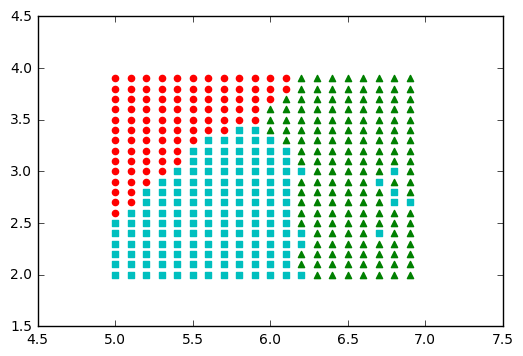

In [44]:
from lib.lin_alg_matrices import *
from math import floor, ceil
import numpy as np

plots = {"setosa": ([], []), "versicolor": ([], []), "virginica": ([], [])}
k = 15

min_sepal_length = ceil(min(get_column(test_data, 0)))
max_sepal_length = floor(max(get_column(test_data, 0)))
min_sepal_width = ceil(min(get_column(test_data, 1)))
max_sepal_width = floor(max(get_column(test_data, 1)))
min_petal_length = ceil(min(get_column(test_data, 2)))
max_petal_length = floor(max(get_column(test_data, 2)))
min_petal_width = ceil(min(get_column(test_data, 3)))
max_petal_width = floor(max(get_column(test_data, 3)))

items = [((o_sepal_length,o_sepal_width), o_species) for o_sepal_length,o_sepal_width,o_petal_length,o_petal_width,o_species in test_data]

for sepal_length in np.arange(min_sepal_length, max_sepal_length, 0.1):
    for sepal_width in np.arange(min_sepal_width, max_sepal_width, 0.1):
        predicted_species = knn_classify(k, items, (sepal_length,sepal_width))
        plots[predicted_species][0].append(sepal_length)
        plots[predicted_species][1].append(sepal_width)
        
for species, (sepal_length,sepal_width) in plots.items():
    plt.scatter(sepal_length, sepal_width, color=colors[species], marker=markers[species], label=species, zorder=10)

plt.show()

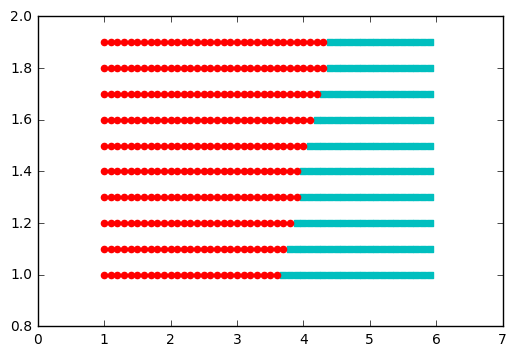

In [48]:
plots = {"setosa": ([], []), "versicolor": ([], []), "virginica": ([], [])}
for petal_length in np.arange(min_petal_length, max_petal_length, 0.1):
    for petal_width in np.arange(min_petal_width, max_petal_width, 0.1):
        predicted_species = knn_classify(k, items, (petal_length, petal_width))
        plots[predicted_species][0].append(petal_length)
        plots[predicted_species][1].append(petal_width)
        
for species, (petal_length, petal_width) in plots.items():
    plt.scatter(petal_length, petal_width, color=colors[species], marker=markers[species], label=species, zorder=10)

plt.show()

In [49]:
def random_point(dim):
    return [random.random() for _ in range(dim)]

In [50]:
def random_distances(dim_num_pairs):
    return[distance(random_point(dim), random_point(dim)) for _ in range(num_pairs)]